In [63]:
!pip install pyvista

In [64]:
import numpy as np
from time import time
import torch

from Barycenter_fixed import barycenter_3d


def rescale_data(mesh, scale):
    mesh.points -= np.array(mesh.center)[None, :]
    diameter = 0.5 * (mesh.points.max() - mesh.points.min())
    mesh.points *= scale / diameter
    return mesh

In [65]:
if __name__ == "__main__":
    import pickle
    import pyvista as pv
    from pyvista import examples
    torch.set_default_dtype(torch.float32)
    device = "cpu"
    if torch.cuda.device_count():
        device = "cuda:0"

    beta = pv.ParametricTorus()
    beta = pv.PolyData(beta)

    alpha = examples.download_bunny()
    # rotate the bunny
    alpha.rotate_x(100)
    alpha.rotate_z(140)
    alpha.rotate_y(-20)
    alpha = alpha.smooth(100, relaxation_factor=0.1)
    beta = beta.smooth(100, relaxation_factor=0.1)

    alpha = rescale_data(alpha, 0.95)
    beta = rescale_data(beta, 0.95)
    beta.rotate_y(90)

    width = 200
    n_features = width ** 3

    hist_grid = torch.linspace(-1., 1., width + 1)
    grid = torch.linspace(-1., 1., width)
    X, Y, Z = torch.meshgrid(grid, grid, grid)
    alpha_hist = np.histogramdd(alpha.points,
                                bins=[hist_grid, hist_grid, hist_grid])[0]
    beta_hist = np.histogramdd(beta.points,
                               bins=[hist_grid, hist_grid, hist_grid])[0]

    alpha_hist /= alpha_hist.sum()
    beta_hist /= beta_hist.sum()
    epsilon = 0.01
    M = (grid[:, None] - grid[None, :]) ** 2
    K = torch.exp(- M / epsilon)
    K = K.to(device)
    hists = np.stack((alpha_hist, beta_hist))
    hists += 1e-10
    hists /= hists.sum(axis=(1, 2, 3))[:, None, None, None]
    hists = torch.tensor(hists).type(torch.float32)
    hists = hists.to(device)
    ws = [0., 0.25,  0.5, 0.75,  1.]
    data = dict(ibp=dict(times=[], bars=[]),
                deb=dict(times=[], bars=[]))
    bars = []
    for ii, w in enumerate(ws):
        print("->>> Doing weight {} ... ".format(ii + 1))
        weights = torch.tensor([1. - w, w], device=device)
        t0 = time()
        bar_deb = barycenter_3d(hists, K, weights=weights, debiased=True)
        t1 = time()
        print("Debiased done in ", t1 - t0)
        bar_ibp = barycenter_3d(hists, K, weights=weights, debiased=False)
        t2 = time()
        print("IBP done in ", t2 - t1)

        data["deb"]["times"].append(t1 - t0)
        data["ibp"]["times"].append(t2 - t1)
        data["deb"]["bars"].append(bar_deb.cpu())
        data["ibp"]["bars"].append(bar_ibp.cpu())

    with open("data/interpolation-data.pkl", "wb") as ff:
        pickle.dump(data, ff)

->>> Doing weight 1 ... 
Barycenter 3d | err =  tensor(5.3699e-08)
Debiased done in  20.353452444076538
Barycenter 3d | err =  tensor(0.)
IBP done in  9.973406076431274
->>> Doing weight 2 ... 
Barycenter 3d | err =  tensor(9.8348e-08)
Debiased done in  35.68857455253601
Barycenter 3d | err =  tensor(1.7092e-08)
IBP done in  9.776988983154297
->>> Doing weight 3 ... 
Barycenter 3d | err =  tensor(9.9314e-08)
Debiased done in  37.585243225097656
Barycenter 3d | err =  tensor(2.6228e-08)
IBP done in  9.409638166427612
->>> Doing weight 4 ... 
Barycenter 3d | err =  tensor(9.9925e-08)
Debiased done in  67.04209923744202
Barycenter 3d | err =  tensor(2.8429e-08)
IBP done in  9.139081478118896
->>> Doing weight 5 ... 
Barycenter 3d | err =  tensor(7.1634e-08)
Debiased done in  12.46369481086731
Barycenter 3d | err =  tensor(0.)
IBP done in  9.135161399841309


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


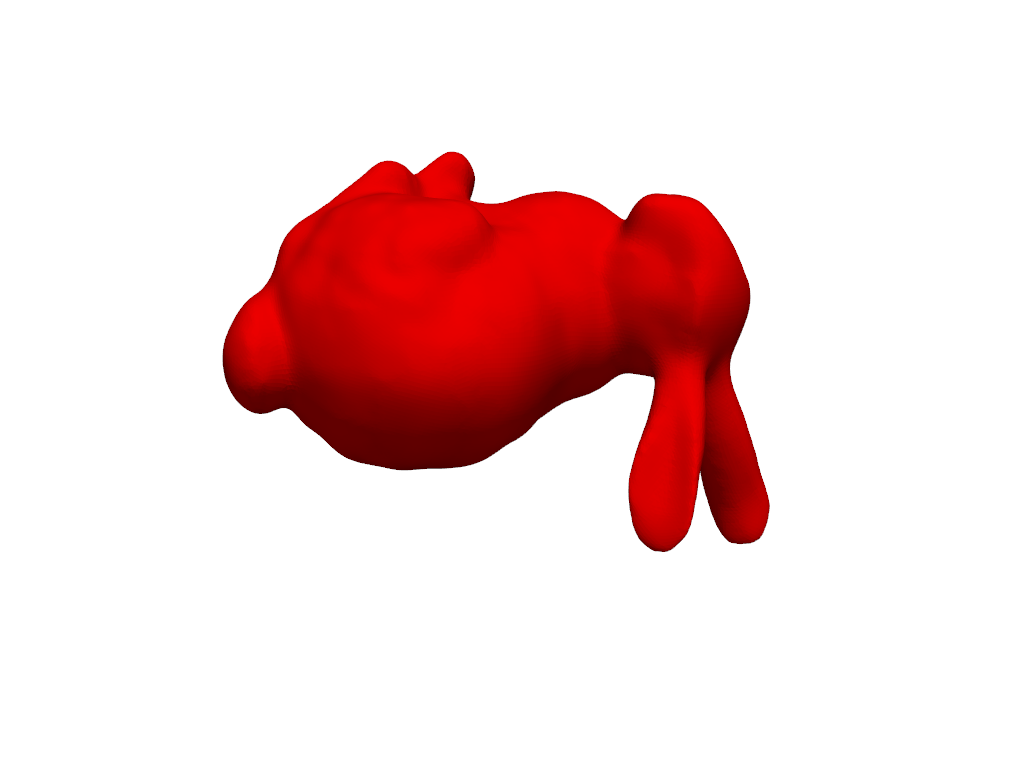

c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


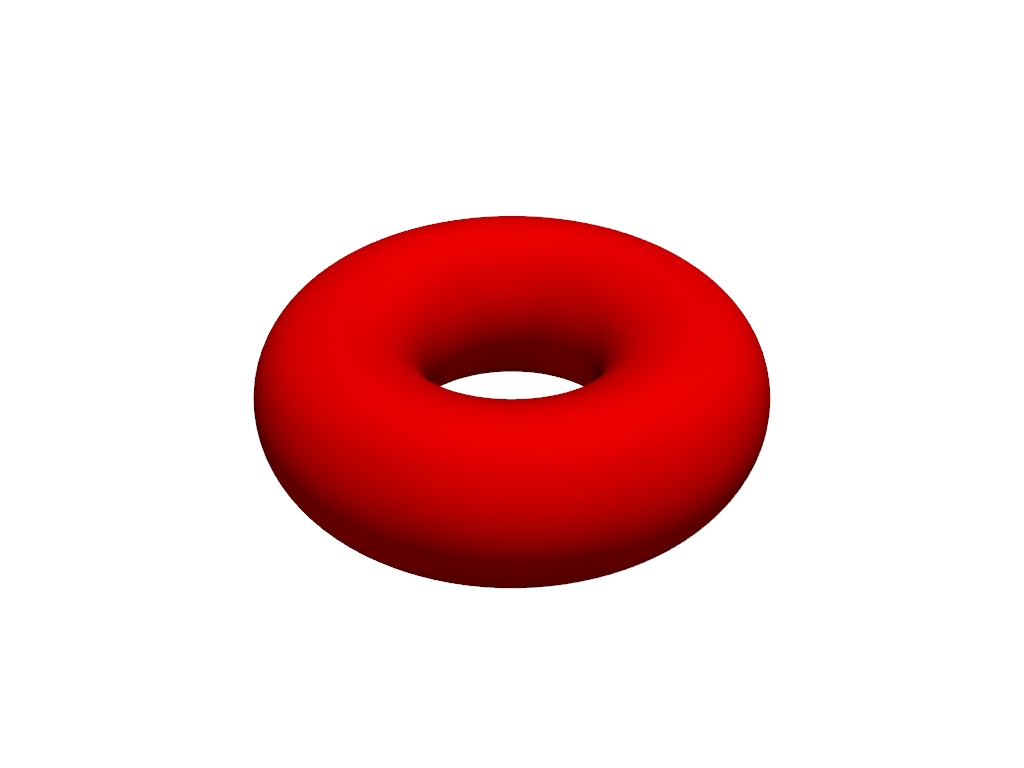

->> creating mesh 1 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


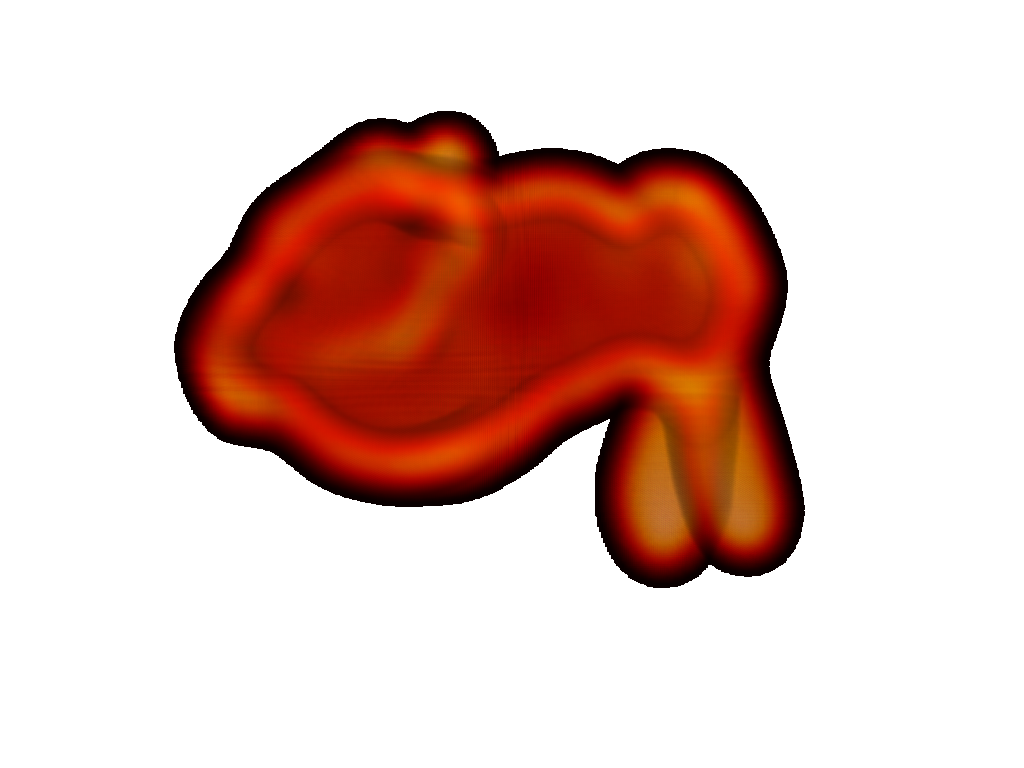

->> creating mesh 2 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


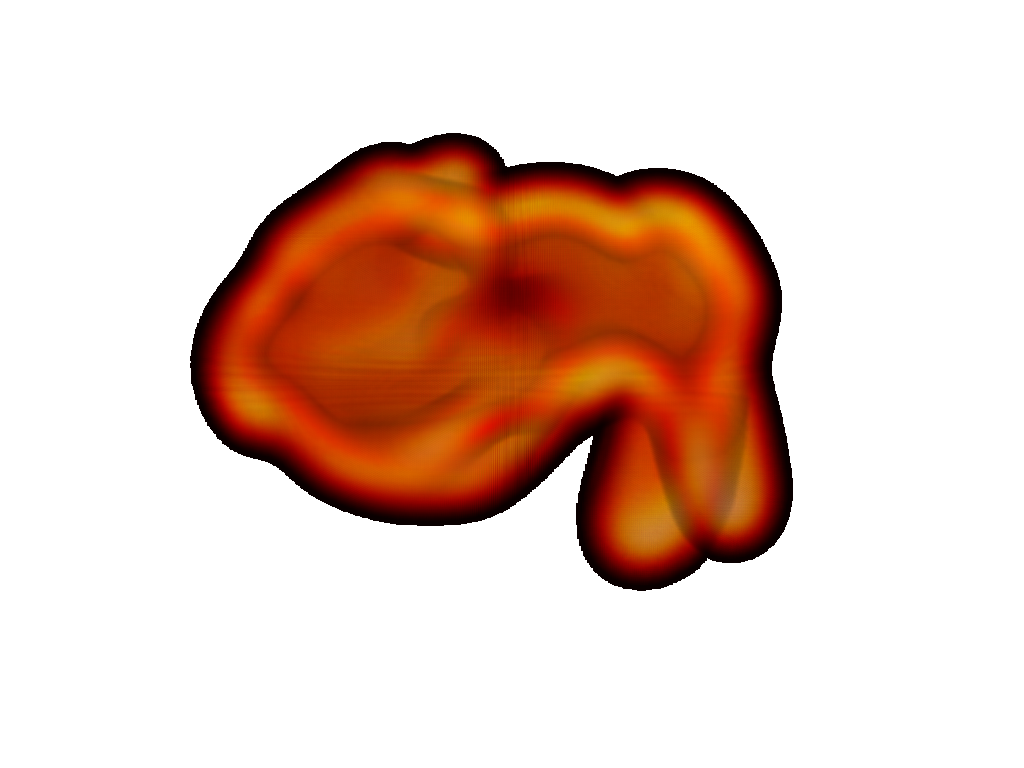

->> creating mesh 3 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


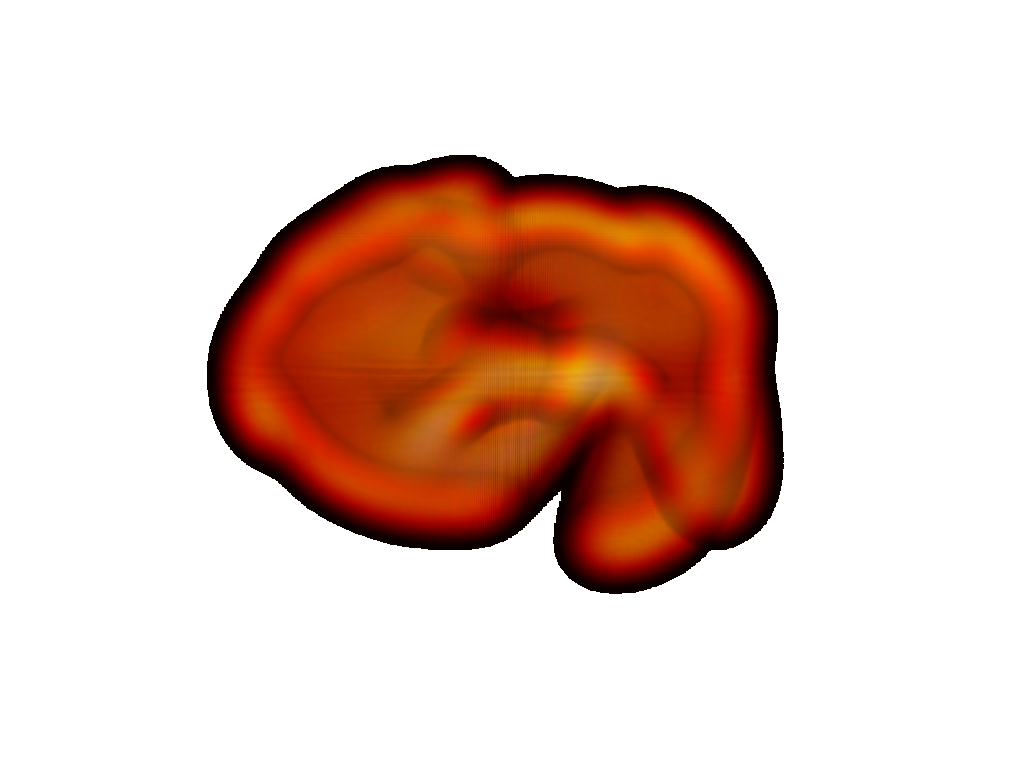

->> creating mesh 4 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


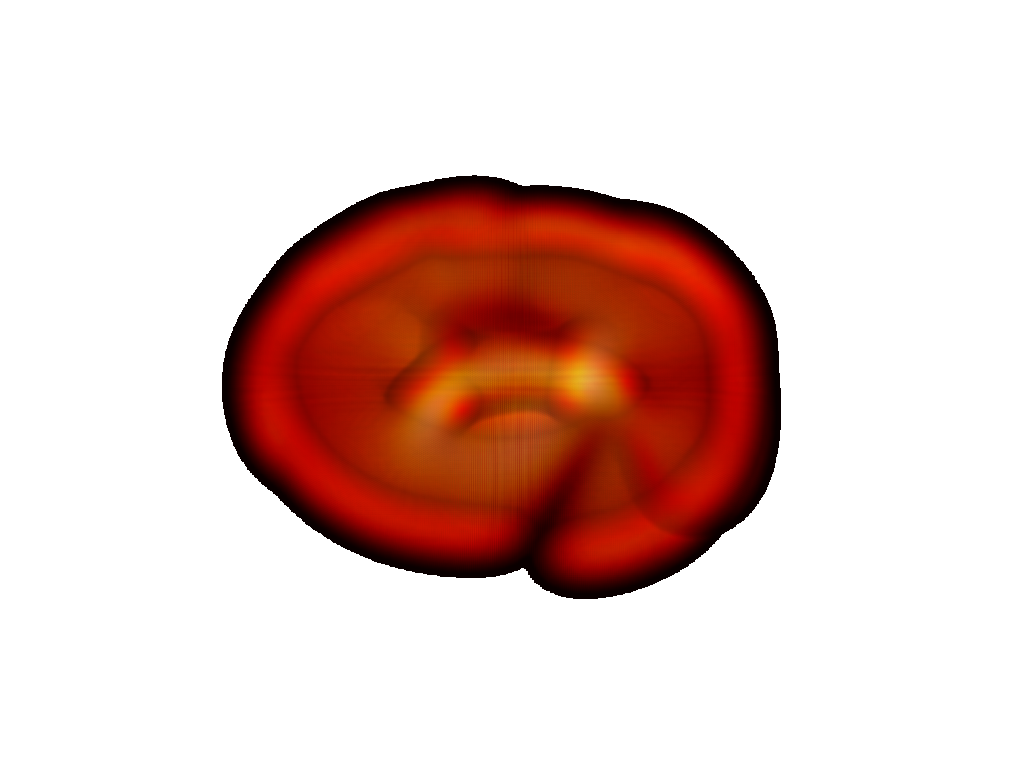

->> creating mesh 5 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


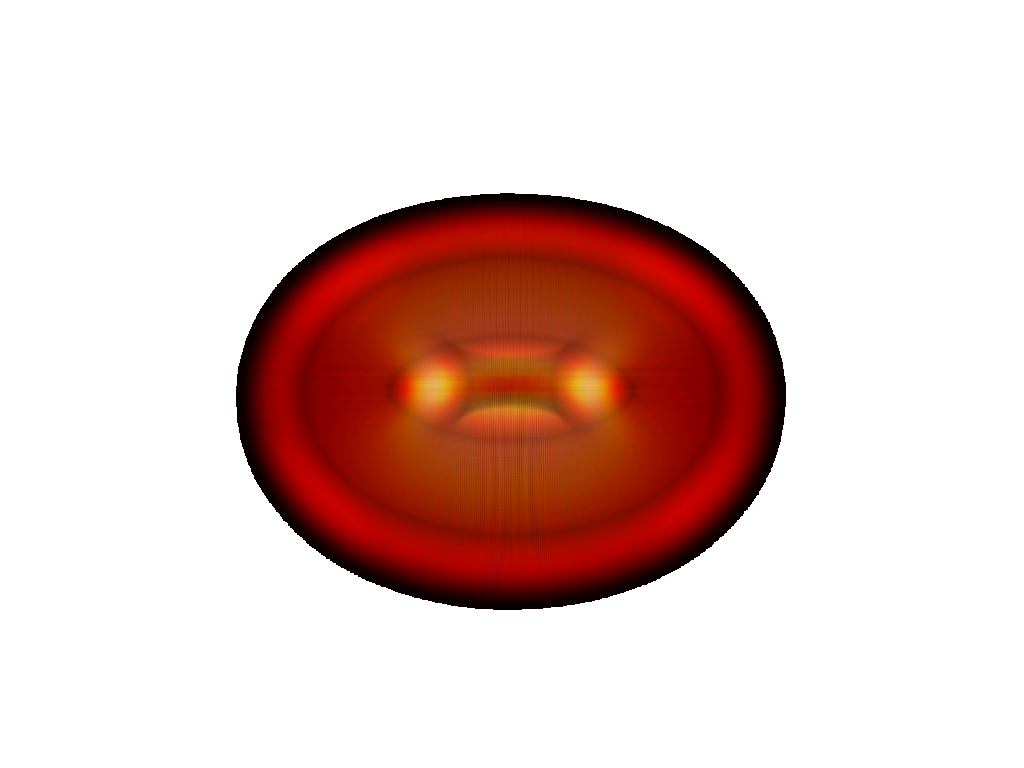

->> creating mesh 1 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


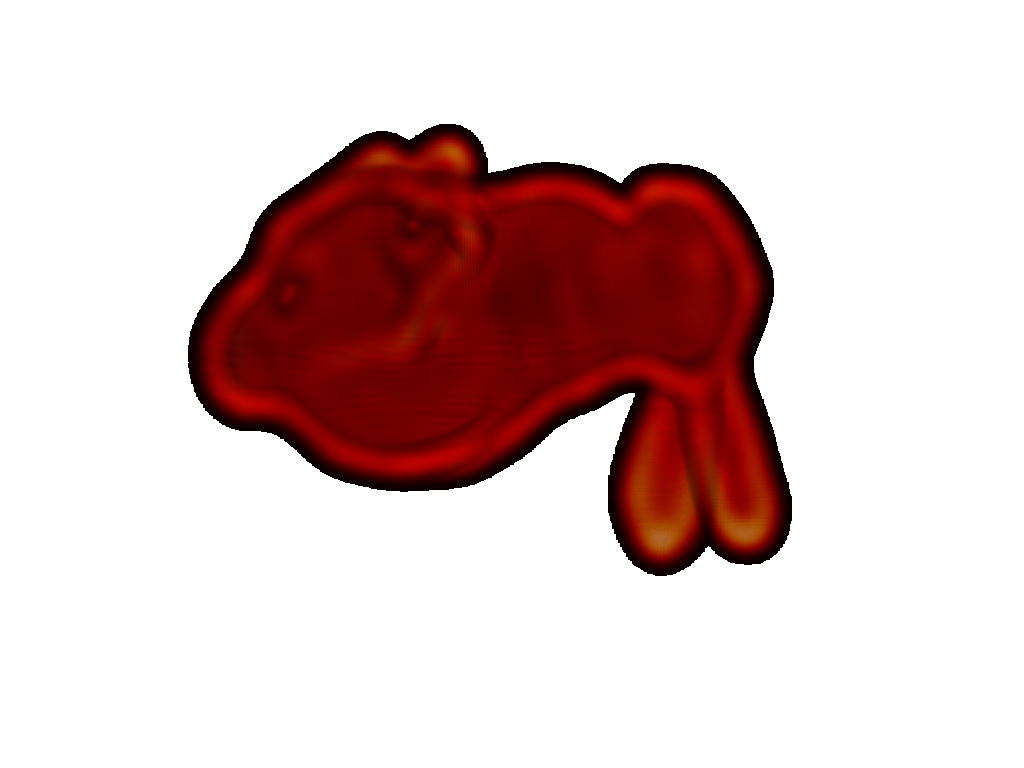

->> creating mesh 2 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


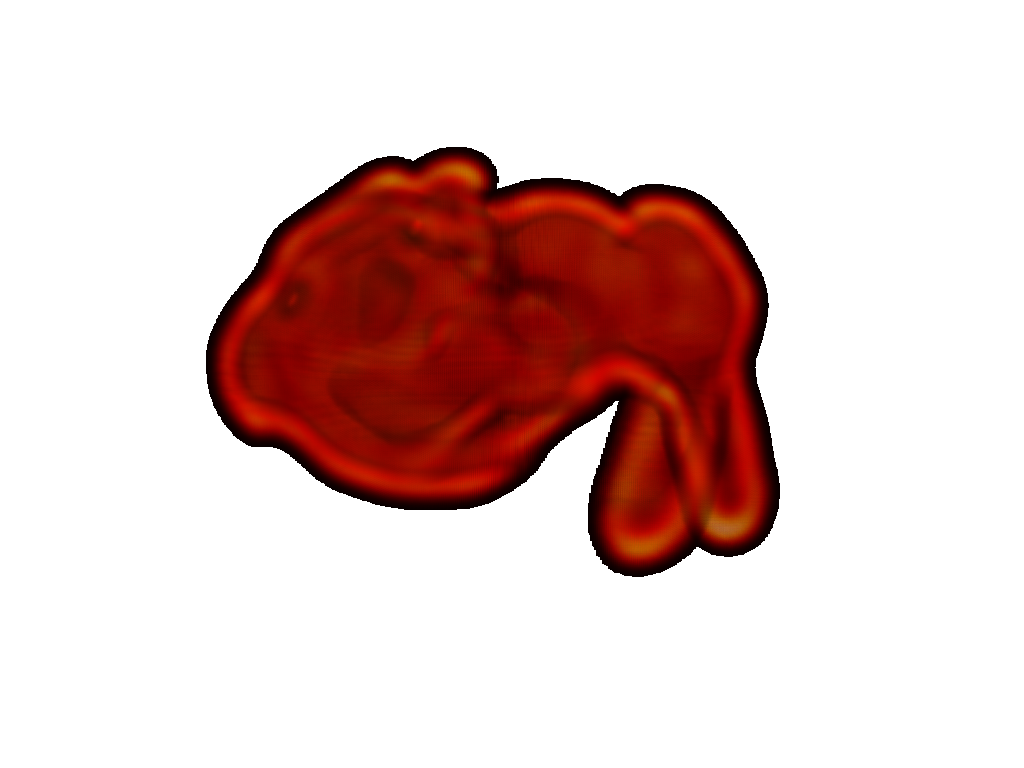

->> creating mesh 3 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


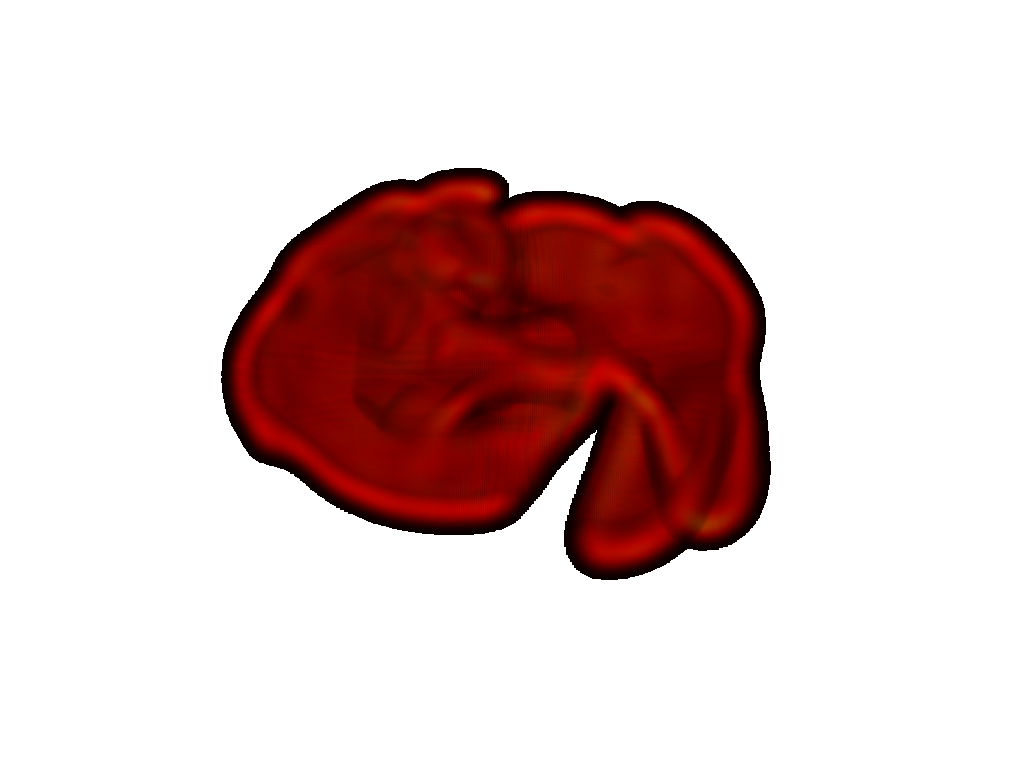

->> creating mesh 4 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


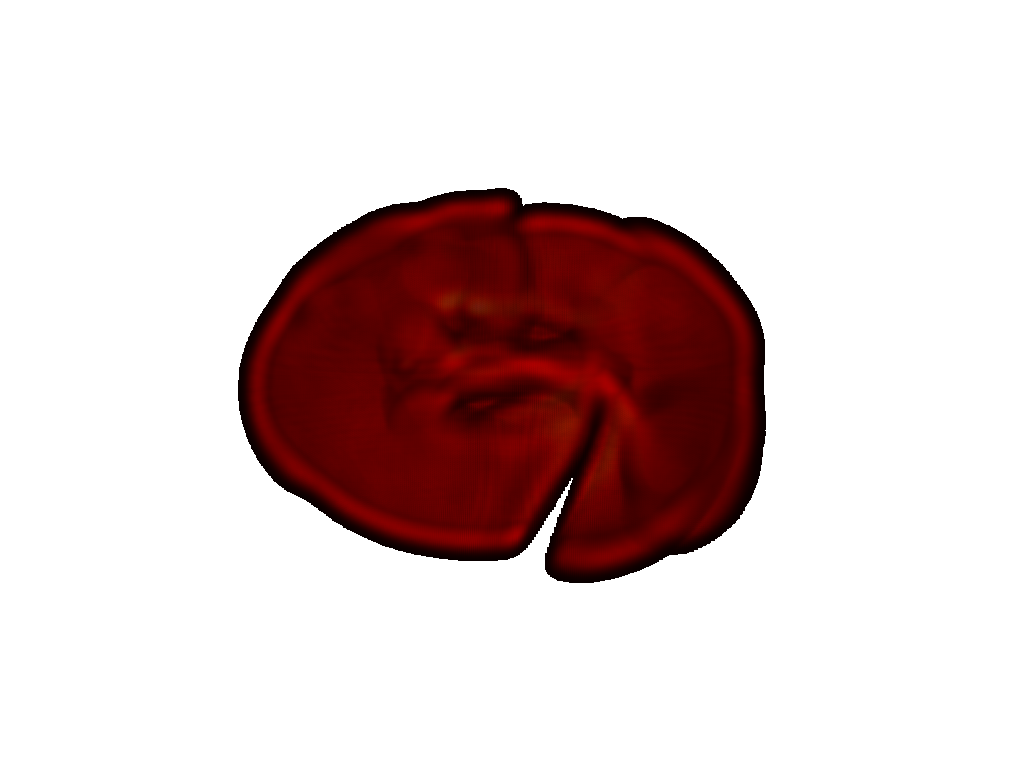

->> creating mesh 5 ... 


c:\Users\THANHTUNG\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


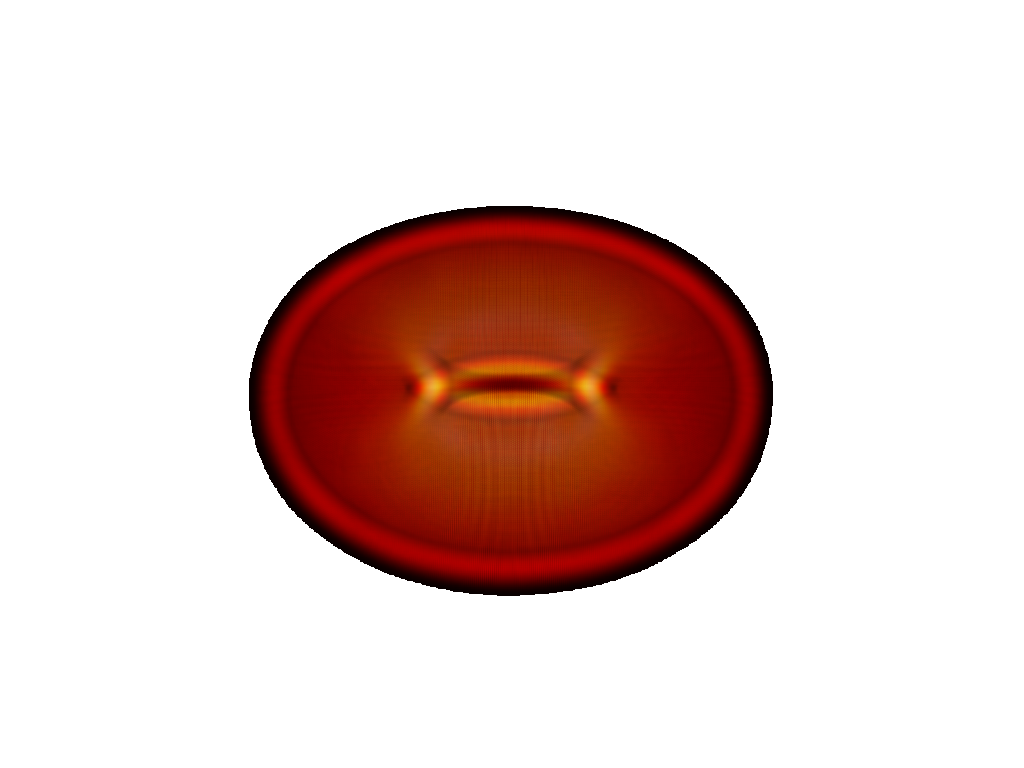

In [66]:
import pickle
import numpy as np
import torch
import pyvista as pv
from pyvista import examples


with open("data/interpolation-data.pkl", "rb") as ff:
    data = pickle.load(ff)


beta = pv.ParametricTorus()
beta = pv.PolyData(beta)

# rotate the tore
beta.rotate_y(90)

alpha = examples.download_bunny()
# rotate the bunny
alpha.rotate_x(100)
alpha.rotate_z(140)
alpha.rotate_y(-20)
alpha = alpha.smooth(100, relaxation_factor=0.1)
beta = beta.smooth(100, relaxation_factor=0.1)

alpha = rescale_data(alpha, 0.95)
beta = rescale_data(beta, 0.95)
width = 200
n_features = width ** 3


hist_grid = torch.linspace(-1., 1., width + 1)
grid = torch.linspace(-1., 1., width)
X, Y, Z = torch.meshgrid(grid, grid, grid)
threshold = 1e-7


plotter = pv.Plotter(off_screen=True, point_smoothing=True)
plotter.set_background("w")
plotter.add_mesh(alpha, color="r")
plotter.show(screenshot="fig/3d/rabbit")

plotter = pv.Plotter(off_screen=True, point_smoothing=True)
plotter.set_background("w")
plotter.add_mesh(beta, color="r")
plotter.show(screenshot="fig/3d/tore")


cpos = [(3.3, 3.3, 3.3), (0.0, 0.005, 0.0), (0.0, 0.0, 1.0)]
meshes = []
for key in ["ibp", "deb"]:
    meshes.append([])
    bars = data[key]["bars"]
    for ii, hist in enumerate(bars):
        print("->> creating mesh {} ... ".format(ii + 1))
        support = torch.where(hist > threshold)
        weights = hist[support].numpy()
        cloud = torch.stack((X[support], Y[support], Z[support])).t()
        mesh = pv.PolyData(cloud.numpy())
        mesh.point_data["weights"] = 1 - weights
        meshes[-1].append(mesh)
        plotter = pv.Plotter(off_screen=True, point_smoothing=True)
        plotter.set_background("w")
        plotter.camera_position = cpos
        plotter.add_mesh(mesh, scalars="weights", opacity="weights",
                         use_transparency=False, cmap="hot_r",
                         style="surface", show_scalar_bar=False)
        plotter.show(screenshot="fig/3d/%s-%d.png" % (key, ii))
        plotter.close()